In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

In [3]:
df = pd.read_csv('bus_table.csv')
display(df.describe())
df.info()

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [4]:
df_null = df[df.isna().any(axis=1)].copy()
df = df.dropna().copy()
df_null.shape

(240, 5)


- `table` дата/время прибытия автобусов по расписанию на остановку
- `arrival` дата/временя актуального прибытия автобуса на остановку


In [6]:
df['table'] = pd.to_datetime(df['data'] + ' ' + df['scheduled'])
df['arrival'] = pd.to_datetime(df['data'] + ' ' + df['actual'])
df.head()

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39


In [7]:
time_difference = df['table'] - df['arrival']
time_difference_in_minutes = time_difference / timedelta(minutes=1)
df.loc[time_difference_in_minutes >= 1000, 'arrival'] = df['arrival'] + dt.timedelta(days=1)
df.loc[time_difference_in_minutes <= -1000, 'arrival'] = df['arrival'] - dt.timedelta(days=1)
df.head()

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39


1. Три самые часто встречающиеся в расписании автобусов временные интервалы

2. `inteval` - интервал по расписаню между автобусами в минутах

3. `arr_inteval` - интервал по фактическому времени прибытия между автобусами в минутах

In [9]:
def interval(data):
    minute = np.timedelta64(1, 'm')
    return data.sort_values().diff() / minute
grouped = df.groupby(['route', 'direction'])
df['inteval'] = grouped['table'].transform(interval)
df['arr_inteval'] = grouped['arrival'].transform(interval)
df.head()

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19,37.0,37.283333
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13,15.0,12.233333
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46,15.0,13.016667
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49,15.0,11.633333
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39,12.0,11.933333


In [10]:
for (route,direction), group in df.groupby(['route', 'direction']):
    display((route,direction))
    display(group['inteval'].value_counts().nlargest(3))

('A', 'north')

inteval
12.0    1434
15.0    1377
7.0      756
Name: count, dtype: int64

('A', 'south')

inteval
15.0    1453
12.0    1312
8.0      710
Name: count, dtype: int64

('B', 'north')

inteval
15.0    1507
12.0    1413
8.0     1141
Name: count, dtype: int64

('B', 'south')

inteval
15.0    1391
12.0    1300
8.0     1159
Name: count, dtype: int64

('C', 'north')

inteval
10.0    1869
15.0     590
6.0      552
Name: count, dtype: int64

('C', 'south')

inteval
10.0    1342
12.0    1087
15.0    1049
Name: count, dtype: int64

##### Нахождение максимального опережения расписания (со знаком минус) и максимального опоздания в минутах

In [12]:
df['late_in_minutes'] = ((df['table'] - df['arrival']) / timedelta(minutes=1)) * -1
display(df['late_in_minutes'].min(),df['late_in_minutes'].max())
df.head()

-12.866666666666667

150.28333333333333

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval,late_in_minutes
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19,37.0,37.283333,1.366667
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13,15.0,12.233333,-3.733333
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46,15.0,13.016667,-1.183333
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49,15.0,11.633333,-3.133333
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39,12.0,11.933333,-0.300000


### Построение  гистограмм для разницы интервалов между автобусами для различных маршрутов и направлений.

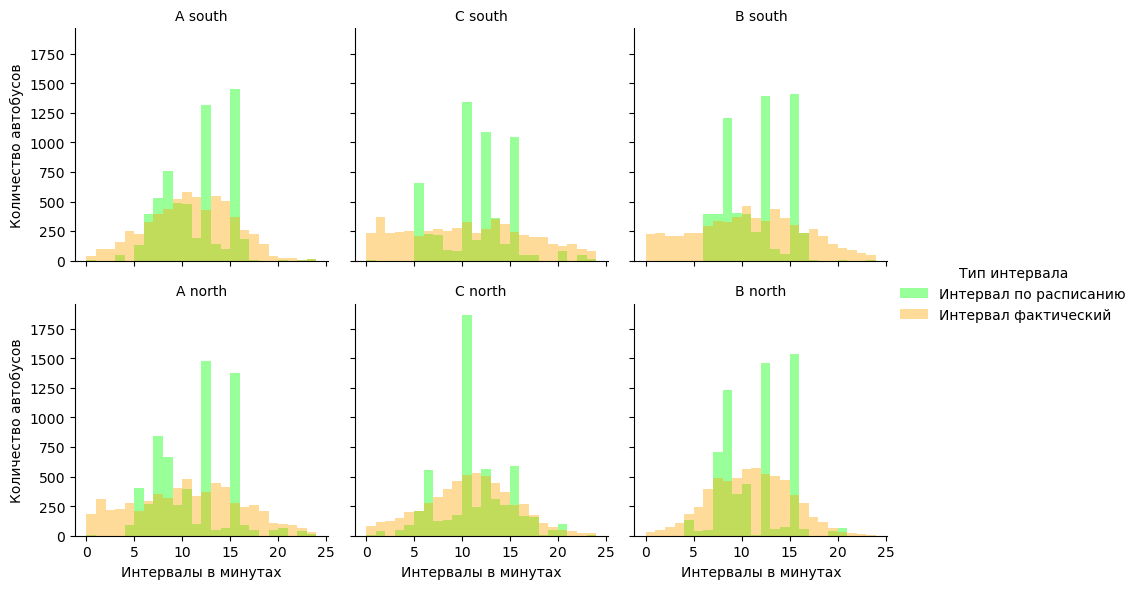

In [14]:
hist = sns.FacetGrid(df, row="direction", col="route", height=3, aspect=1)

def plot_hist(data, color, label):
    plt.hist(data, bins=np.arange(25), color=color, alpha=0.4, label=label)

hist.map(plot_hist, "inteval", color="lime", label="Интервал по расписанию")
hist.map(plot_hist, "arr_inteval", color="orange", label="Интервал фактический")
hist.add_legend(title='Тип интервала')
hist.set_titles('{col_name} {row_name}')
hist.set_axis_labels('Интервалы в минутах', 'Количество автобусов')

### Построение  гистограмм времени опоздания автобуса в зависимости от маршрута и направления.

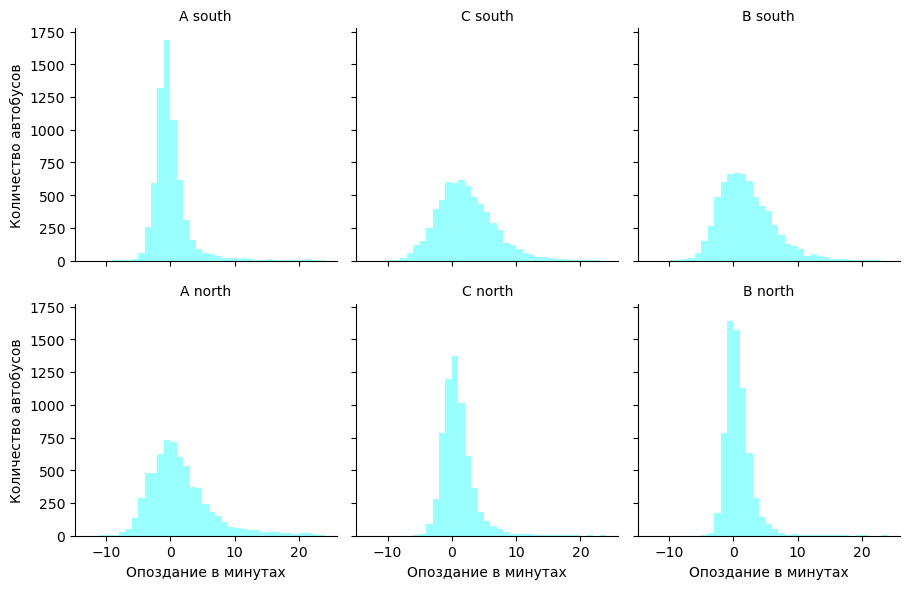

In [16]:
hist2 = sns.FacetGrid(df, row="direction", col="route", height=3, aspect=1)
hist2.map(plt.hist,"late_in_minutes", bins=np.arange(-13,25), color='cyan', alpha=0.4)
hist2.set_titles('{col_name} {row_name}')
hist2.set_axis_labels('Опоздание в минутах', 'Количество автобусов')

#### Из графиков видно, что остановка, на которой собраны данные, находится ближе к северной конечной остановке маршрута A и ближе к южным конечным остановкам маршрутов B и C. 
Двигаясь с севера на юг по маршруту А опоздание не успевает накопиться так, как в случае движения на север. В случаях с маршрутами B и C наоборот.